# Assignment 3: Construction of a predictive model using Spark Structured Streaming and textual data (Hacker News)

## 1. Construction of a data set using the provided stream

In [1]:
import threading

# Helper thread to avoid the Spark StreamingContext from blocking Jupyter
        
class StreamingThread(threading.Thread):
    def __init__(self, ssc):
        super().__init__()
        self.ssc = ssc
    def run(self):
        self.ssc.start()
        self.ssc.awaitTermination()
    def stop(self):
        print('----- Stopping... this may take a few seconds -----')
        self.ssc.stop(stopSparkContext=False, stopGraceFully=True)

In [2]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [3]:
spark

In [4]:
socketDF = spark.readStream.format("socket").option("host", "seppe.net").option("port", 7778).load()
socketDF.printSchema()

root
 |-- value: string (nullable = true)



In [5]:
from pyspark.sql.functions import from_json, schema_of_json

In [6]:
def process_row(df, epoch_id):
    print(epoch_id)
    if df.count() == 0: return
    schema = schema_of_json(df.first().value)
    df_cols = df.selectExpr('CAST(value AS STRING)')\
        .select(from_json('value', schema)\
        .alias('temp'))\
        .select('temp.*')
    df_cols.show()
    # We can also save here using something such as:
    df.write.format("json").mode("append").save("data")

In [7]:
query = socketDF.writeStream.trigger(processingTime='5 seconds').foreachBatch(process_row).start()  

0
1
+--------+--------+---------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+-------+-----+
|     aid|comments|         domain|frontpage|          posted_at|         source_text|        source_title|               title|                 url|   user|votes|
+--------+--------+---------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+-------+-----+
|40250318|       0|github.com/rivo|    false|2024-05-03 17:48:46|GitHub - rivo/tvi...|GitHub - rivo/tvi...|Tview – Golang Te...|https://github.co...|apitman|    2|
|40250326|       0|     nature.com|     true|2024-05-03 17:49:19|Who’s making chip...|Who’s making chip...|Who's making chip...|https://www.natur...|   rntn|    4|
+--------+--------+---------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+-------+-----+

2
+--------

10
+--------+--------+-------------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+-----------+-----+
|     aid|comments|             domain|frontpage|          posted_at|         source_text|        source_title|               title|                 url|       user|votes|
+--------+--------+-------------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+-----------+-----+
|40250519|       0|    glitchcomet.com|     true|2024-05-03 18:06:53|How hard can gene...|How hard can gene...|How hard can gene...|https://glitchcom...|techedlaksh|    4|
|40250525|       0|sato-team.github.io|     true|2024-05-03 18:07:17|SATO: Stable Text...|SATO: Stable Text...|SATO: Stable Text...|https://sato-team...|    Sajarin|    6|
+--------+--------+-------------------+---------+-------------------+--------------------+--------------------+--------------------+-----

19
+--------+--------+-----------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+-----------+-----+
|     aid|comments|     domain|frontpage|          posted_at|         source_text|        source_title|               title|                 url|       user|votes|
+--------+--------+-----------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+-----------+-----+
|40250733|       0|0pointer.de|    false|2024-05-03 18:29:16|The Biggest Myths...|   The Biggest Myths|Systemd's Biggest...|https://0pointer....|goranmoomin|    2|
|40250735|       0| acoup.blog|     true|2024-05-03 18:29:19|Collections: Phal...|Collections: Phal...|Phalanx's Twiligh...|https://acoup.blo...|      Tomte|    7|
+--------+--------+-----------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+-----------+-----+

20
+--------

28
+--------+--------+-----------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+------+-----+
|     aid|comments|     domain|frontpage|          posted_at|         source_text|        source_title|               title|                 url|  user|votes|
+--------+--------+-----------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+------+-----+
|40250952|       0|brandur.org|    false|2024-05-03 18:52:43|Ruby typing 2024:...|Ruby typing 2024:...|Ruby typing 2024:...|https://brandur.o...|conroy|    1|
+--------+--------+-----------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+------+-----+

29
+--------+--------+-------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+----+-----+
|     aid|comments| domain|frontpage|        

37
+--------+--------+--------+---------+-------------------+--------------------+----------------+--------------------+--------------------+------+-----+
|     aid|comments|  domain|frontpage|          posted_at|         source_text|    source_title|               title|                 url|  user|votes|
+--------+--------+--------+---------+-------------------+--------------------+----------------+--------------------+--------------------+------+-----+
|40251116|       0|nejm.org|    false|2024-05-03 19:05:20|Just a moment...\...|Just a moment...|Highly Pathogenic...|https://www.nejm....|Anon84|    1|
+--------+--------+--------+---------+-------------------+--------------------+----------------+--------------------+--------------------+------+-----+

38
+--------+--------+---------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+-------+-----+
|     aid|comments|         domain|frontpage|          posted_at|    

46
+--------+--------+--------------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+----------+-----+
|     aid|comments|              domain|frontpage|          posted_at|         source_text|        source_title|               title|                 url|      user|votes|
+--------+--------+--------------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+----------+-----+
|40251370|       0|digitalcameraworl...|    false|2024-05-03 19:30:12|This Leica lens i...|This Leica lens i...|Leica Lens Is 1600mm|https://www.digit...|     Tomte|    1|
|40251398|       0|ivanludvig.github.io|    false|2024-05-03 19:33:03|K-Means WebGPU Im...|K-Means WebGPU Im...|K-Means WebGPU Im...|https://ivanludvi...|IvanLudvig|    2|
|40251450|       0|         archive.org|    false|2024-05-03 19:36:33|feynman_lectures_...|feynman_lectures_...|Feynman Lectures ...|http

55
+--------+--------+-----------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+-----------+-----+
|     aid|comments|           domain|frontpage|          posted_at|         source_text|        source_title|               title|                 url|       user|votes|
+--------+--------+-----------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+-----------+-----+
|40251673|       0|timeextension.com|    false|2024-05-03 19:55:36|The Truth About R...|The Truth About R...|The Truth About R...|https://www.timee...|theogravity|    2|
+--------+--------+-----------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+-----------+-----+

56
+--------+--------+-----------+---------+-------------------+--------------------+--------------------+--------------------+-------------------

64
+--------+--------+------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+----+-----+
|     aid|comments|domain|frontpage|          posted_at|         source_text|        source_title|               title|                 url|user|votes|
+--------+--------+------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+----+-----+
|40251809|       0|dw.com|    false|2024-05-03 20:08:09|Germany summons R...|Germany summons R...|Germany summons R...|https://www.dw.co...|rntn|    1|
+--------+--------+------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+----+-----+

65
+--------+--------+-------------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+----------+-----+
|     aid|comments|             domain|frontpage|          pos

73
+--------+--------+------------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+------+-----+
|     aid|comments|            domain|frontpage|          posted_at|         source_text|        source_title|               title|                 url|  user|votes|
+--------+--------+------------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+------+-----+
|40252089|       0|         coryd.dev|    false|2024-05-03 20:34:20|Adblocker require...|  Adblocker required|  Adblocker Required|https://coryd.dev...|  cdme|    2|
|40252107|       6|lunduke.locals.com|     true|2024-05-03 20:36:29|Shared post - Why...|Why is Firefox ca...|Why is Firefox ca...|https://lunduke.l...|gulced|   12|
+--------+--------+------------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+------+-----+



82
+--------+--------+--------------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+----------+-----+
|     aid|comments|              domain|frontpage|          posted_at|         source_text|        source_title|               title|                 url|      user|votes|
+--------+--------+--------------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+----------+-----+
|40252409|       0|hollywoodreporter...|    false|2024-05-03 21:07:44|'Godzilla Minus O...|‘Godzilla Minus O...|'Godzilla Minus O...|https://www.holly...|walterbell|    2|
|40252437|       0|        yugabyte.com|    false|2024-05-03 21:10:51|Raft Protocol: Wh...|Raft Protocol: Wh...|What Is the Raft ...|https://www.yugab...|     fzliu|    1|
+--------+--------+--------------------+---------+-------------------+--------------------+--------------------+--------------------+----

92
+--------+--------+-------+---------+-------------------+--------------------+---------------+--------------------+--------------------+-----------+-----+
|     aid|comments| domain|frontpage|          posted_at|         source_text|   source_title|               title|                 url|       user|votes|
+--------+--------+-------+---------+-------------------+--------------------+---------------+--------------------+--------------------+-----------+-----+
|40252575|       0|cnn.com|    false|2024-05-03 21:27:09|edition.cnn.com\n...|edition.cnn.com|CNSA launches sec...|https://www.cnn.c...|basementcat|    1|
+--------+--------+-------+---------+-------------------+--------------------+---------------+--------------------+--------------------+-----------+-----+

93
+--------+--------+--------------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+-----------+-----+
|     aid|comments|              domain|front

102
+--------+--------+--------------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+------------+-----+
|     aid|comments|              domain|frontpage|          posted_at|         source_text|        source_title|               title|                 url|        user|votes|
+--------+--------+--------------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+------------+-----+
|40252781|       0|documentfoundatio...|     true|2024-05-03 21:48:30|Announcement of L...|Announcement of L...|LibreOffice 24.2....|https://blog.docu...|neustradamus|    4|
|40252784|       0|        fzakaria.com|    false|2024-05-03 21:48:43|Speeding up ELF r...|Speeding up ELF r...|Speeding up ELF r...|https://fzakaria....|    setheron|    2|
+--------+--------+--------------------+---------+-------------------+--------------------+--------------------+--------------

112
+--------+--------+------------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+----------+-----+
|     aid|comments|            domain|frontpage|          posted_at|         source_text|        source_title|               title|                 url|      user|votes|
+--------+--------+------------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+----------+-----+
|40252910|       0|       nytimes.com|    false|2024-05-03 22:04:45|The Perils of the...|The Perils of the...|The Perils of the...|https://www.nytim...|petethomas|    1|
|40252914|       0|notboring.software|    false|2024-05-03 22:05:20|The World's Most ...|The World's Most ...|The Most Satisfyi...|https://www.notbo...|wallflower|    2|
+--------+--------+------------------+---------+-------------------+--------------------+--------------------+--------------------+---------------

121
+--------+--------+---------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+------------+-----+
|     aid|comments|         domain|frontpage|          posted_at|         source_text|        source_title|               title|                 url|        user|votes|
+--------+--------+---------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+------------+-----+
|40253170|       0|theregister.com|     true|2024-05-03 22:43:24|RHEL 9.4 is here,...|RHEL 9.4 is here,...|RHEL stays fresh ...|https://www.there...|     lproven|    3|
|40253195|       0|    jacobin.com|    false|2024-05-03 22:47:13|The Canadian Stat...|The Canadian Stat...|The Canadian Stat...|https://jacobin.c...|rokkitmensch|    1|
+--------+--------+---------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+--

130
+--------+--------+-------------------+---------+-------------------+--------------------+----------------+--------------------+--------------------+---------+-----+
|     aid|comments|             domain|frontpage|          posted_at|         source_text|    source_title|               title|                 url|     user|votes|
+--------+--------+-------------------+---------+-------------------+--------------------+----------------+--------------------+--------------------+---------+-----+
|40253496|       0|medium.com/komorama|    false|2024-05-03 23:38:16|Just a moment...\...|Just a moment...|The Iterative Adj...|https://medium.co...|kiyanwang|    1|
+--------+--------+-------------------+---------+-------------------+--------------------+----------------+--------------------+--------------------+---------+-----+

131
+--------+--------+------------+---------+-------------------+--------------------+--------------------+--------------------+--------------------+-----------+---

In [8]:
query.stop()

The historical data that was collected through the provided stream represents JSON dictionaries containing the following 11 variables:
- id
- title
- url
- domain (i.e., the website where a given article is published)
- votes
- user
- posted_at (in the format "yyyy-mm-dd hh:mm:ss)
- comments
- source_title
- source_text
- frontpage (i.e. our target)

In [9]:
#Reading the directory of the saved text files into a Spark DataFrame
import pandas as pd
import json
path_to_json = ["C:/Users/HP/Downloads/spark/spark/notebooks/data (train)/data (29.04.2024)", 
                "C:/Users/HP/Downloads/spark/spark/notebooks/data (train)/data (30.04.2024) - 1",
                "C:/Users/HP/Downloads/spark/spark/notebooks/data (train)/data (30.04.2024) - 2",
                "C:/Users/HP/Downloads/spark/spark/notebooks/data (train)/data (01.05.2024) - 1",
                "C:/Users/HP/Downloads/spark/spark/notebooks/data (train)/data (01.05.2024) - 2",
                "C:/Users/HP/Downloads/spark/spark/notebooks/data (train)/data (02.05.2024) - 1",
                "C:/Users/HP/Downloads/spark/spark/notebooks/data (train)/data (02.05.2024) - 2",
                "C:/Users/HP/Downloads/spark/spark/notebooks/data (train)/data (03.05.2024) - 1",
                "C:/Users/HP/Downloads/spark/spark/notebooks/data (train)/data (03.05.2024) - 2"]

pandas_dataframe = pd.DataFrame()
for j in path_to_json:
    for file_name in [file for file in os.listdir(j) if file.endswith('.json')]:
      with open(j + "/" + file_name) as json_file:
        data = json.load(json_file)
        result = json.loads(data["value"]) #converting string to dictionary
        pd_dataframe = pd.DataFrame.from_dict(result, orient = "index").transpose() #converting dictionary to dataframe
        pandas_dataframe = pd.concat([pandas_dataframe, pd_dataframe], ignore_index=True)
        print(pandas_dataframe)

        aid                                             title  \
0  40192992  A proof that Unix utility sed is Turing complete   

                                                 url        domain votes  \
0  https://catonmat.net/proof-that-sed-is-turing-...  catonmat.net     2   

        user            posted_at comments source_title source_text frontpage  
0  sebmellen  2024-04-28 23:37:49        0         None        \n\n     False  
        aid                                             title  \
0  40192992  A proof that Unix utility sed is Turing complete   
1  40191447                                      Pip Boy 3000   

                                                 url        domain votes  \
0  https://catonmat.net/proof-that-sed-is-turing-...  catonmat.net     2   
1        https://www.youtube.com/watch?v=bYuz6xOAkfc   youtube.com     1   

        user            posted_at comments  source_title  \
0  sebmellen  2024-04-28 23:37:49        0          None   
1   brudger

         aid                                              title  \
0   40192992   A proof that Unix utility sed is Turing complete   
1   40191447                                       Pip Boy 3000   
2   40193037  Recollections of Early Chip Development at Int...   
3   40193159  The History of Non-Secret Encryption (1987) [pdf]   
4   40192566  Sexsomnia: An embarrassing sleep disorder no o...   
5   40191461         Art isn't supposed to make you comfortable   
6   40191636  A Free PHP Webpage View Counter That Ignores S...   
7   40191938  US Homeland Security names AI safety, security...   
8   40192972              Chained ttys for side-by-side reading   
9   40191715  Global debt hasn't been this bad since the Nap...   
10  40192190  Introducing the Ultimate Stand for Apple Visio...   
11  40191313   Chinese Subs May Be Propelled Silently by Lasers   
12  40191825                                            NextDNS   
13  40192932  Cognita: Retrieve Information from Documents w..

         aid                                              title  \
0   40192992   A proof that Unix utility sed is Turing complete   
1   40191447                                       Pip Boy 3000   
2   40193037  Recollections of Early Chip Development at Int...   
3   40193159  The History of Non-Secret Encryption (1987) [pdf]   
4   40192566  Sexsomnia: An embarrassing sleep disorder no o...   
5   40191461         Art isn't supposed to make you comfortable   
6   40191636  A Free PHP Webpage View Counter That Ignores S...   
7   40191938  US Homeland Security names AI safety, security...   
8   40192972              Chained ttys for side-by-side reading   
9   40191715  Global debt hasn't been this bad since the Nap...   
10  40192190  Introducing the Ultimate Stand for Apple Visio...   
11  40191313   Chinese Subs May Be Propelled Silently by Lasers   
12  40191825                                            NextDNS   
13  40192932  Cognita: Retrieve Information from Documents w..

         aid                                              title  \
0   40192992   A proof that Unix utility sed is Turing complete   
1   40191447                                       Pip Boy 3000   
2   40193037  Recollections of Early Chip Development at Int...   
3   40193159  The History of Non-Secret Encryption (1987) [pdf]   
4   40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..       ...                                                ...   
79  40191856       Ra Paulette's Hand-Carved Caves – New Mexico   
80  40192301        AI is making Meta's apps basically unusable   
81  40192502             Create an entire Hexcrawl world online   
82  40193155  Ukraine Appears to Be Using Light Planes Conve...   
83  40191693                                  E1S – K9s for ECS   

                                                  url               domain  \
0   https://catonmat.net/proof-that-sed-is-turing-...         catonmat.net   
1         https://www.youtube.com/watch

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
107  40192847  Islamists demonstrate in Hamburg: "Caliphate i...   
108  40192737              Your Developer Approach Is Struggling   
109  40191486  Harry Chapin and RATM: the problem with bleedi...   
110  40192707  Feedback for Idea to App: launch to the AppSto...   
111  40192772                                         Phosphenes   

                                                   url            domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1          https://www.youtube.

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
136  40206301  Evolution has optimized the magnetic sensor in...   
137  40206064  Four months into office, Argentine President J...   
138  40204390         Exploring the Enigma of Database Vacuuming   
139  40206738  The volunteers putting forgotten villages on t...   
140  40205259  Scientists harness the wind as a tool to move ...   

                                                   url             domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...       catonmat.net   
1          https://www.youtub

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
164  40204949  SpaceX Employees Are Getting Hurt in Alarming ...   
165  40204244            The FSF fights for your right to repair   
166  40205468  Stocks Trade for 390 Minutes a Day. Increasing...   
167  40205661      Memary: Long-Term Memory for Smarter Chatbots   
168  40204154  ChatGPT’s AI ‘memory’ can remember the prefere...   

                                                   url  \
0    https://catonmat.net/proof-that-sed-is-turing-...   
1          https://www.youtube.com/watch?v=bYuz6xOAkfc   
2    http

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
186  40204406                  ARKK's Problem Was Outperformance   
187  40204611       Testing LLMs for sequence extraction attacks   
188  40206712                  Using SQLite as a Key-Value Store   
189  40204669  Fallout 76 hits over 1M players in a single da...   
190  40206873  Doclite: PHP NoSQL database and document store...   

                                                   url               domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...         catonmat.net   
1          https://www.yo

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
213  40206367  What consumers should know as Philips agrees t...   
214  40206648                                Worldwide Telescope   
215  40205177                  America Lost the Plot with TikTok   
216  40206752                           Why SQLite Uses Bytecode   
217  40204660                                   Origins of Covid   

                                                   url  \
0    https://catonmat.net/proof-that-sed-is-turing-...   
1          https://www.youtube.com/watch?v=bYuz6xOAkfc   
2    http

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
237  40206379  First Time Ever Laser Excitation of an Atomic ...   
238  40204276  Australian government to invest $1B in quantum...   
239  40206140  Google's Inaccurate Attempt to Celebrate Sonic...   
240  40206742                      Mactop Released (Open Source)   
241  40205142                                      filetype:php3   

                                                   url  \
0    https://catonmat.net/proof-that-sed-is-turing-...   
1          https://www.youtube.com/watch?v=bYuz6xOAkfc   
2    http

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
267  40204153     Show HN: Labour Quest, a Simple Resume Builder   
268  40204738         Researchers detect a new molecule in space   
269  40204336  AstraZeneca is no longer available in Australi...   
270  40205430  Carrie Fisher on Star Wars: 'The most expensiv...   
271  40205567  Can Xerox's PARC, a Silicon Valley Icon, Find ...   

                                                   url  \
0    https://catonmat.net/proof-that-sed-is-turing-...   
1          https://www.youtube.com/watch?v=bYuz6xOAkfc   
2    http

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
296  40206382  Show HN: A cross-platform version manager for ...   
297  40204284                                   Context collapse   
298  40204087  FCC Fines Major U.S. Wireless Carriers for Sel...   
299  40205129  Elon Musk's 'Twitter sitter' appeal over Tesla...   
300  40205175  Benchmarking Mobile Device Control Agents Acro...   

                                                   url               domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...         catonmat.net   
1          https://www.yo

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
319  40214423  Cybersecurity incident made London Drugs store...   
320  40214953                                       Walking Maps   
321  40213146  Dolphin Emulator: Progress Report February, Ma...   
322  40213801      Balter-rs: Composable load testing using Rust   
323  40216567  Elixir 1.17 type inference of struct and map f...   

                                                   url                 domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...           catonmat.net   
1          https://ww

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
345  40213576  Imagine living in a 4-foot body that doesn't d...   
346  40213257  Retry-After sent with HTTP 503 response is ign...   
347  40215618    Super Mario Land 2 – Memory Exploration [video]   
348  40215765                              Liburing 2.6 Released   
349  40216116  JFrog research discovers coordinated attacks o...   

                                                   url                domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...          catonmat.net   
1          https://www.

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
376  40216268                     Internet Archive: Open Library   
377  40213289       The Codex Funeral: Why Books Are Dead (2013)   
378  40215515  Anzu launches US-based licensed clone of DJI M...   
379  40213977                           The Battle for Attention   
380  40213113  Musk lays off Tesla senior executives in fresh...   

                                                   url  \
0    https://catonmat.net/proof-that-sed-is-turing-...   
1          https://www.youtube.com/watch?v=bYuz6xOAkfc   
2    http

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
397  40214256  Neo Store v1.0.0 alternative Android app store...   
398  40215285       Ladybird browser update (April 2024) [video]   
399  40215128  MIT 6.S191 Introduction to Deep Learning (2024...   
400  40215283   Lateral Thinking: examples of creative solutions   
401  40216363                         llama.cpp bfloat16 support   

                                                   url  \
0    https://catonmat.net/proof-that-sed-is-turing-...   
1          https://www.youtube.com/watch?v=bYuz6xOAkfc   
2    http

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
427  40216952  More than half of cats died after drinking raw...   
428  40213454  War Zone Surveillance Technology Is Hitting Am...   
429  40215722  A man who turned his home into a homeless shelter   
430  40212887                      Real World Crypto 2024 Videos   
431  40215633  Benchmarking Benchmark Leakage in Large Langua...   

                                                   url            domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1          https://www.youtube.

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
455  40217433  AI Knowledge Management Explained: A Guide for...   
456  40213953  What happens when private equity takes over ai...   
457  40215563     I put gpt2-chatbot's coding skills to the test   
458  40213137  SatBird: A Dataset for Bird Species Distributi...   
459  40216543                                       AI Hesitancy   

                                                   url  \
0    https://catonmat.net/proof-that-sed-is-turing-...   
1          https://www.youtube.com/watch?v=bYuz6xOAkfc   
2    http

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
481  40216163  Tesla still plans to grow the Supercharger net...   
482  40215767           Run llama3 locally with 1M token context   
483  40215099  Ecology in science fiction: interview with Adr...   
484  40214952  Found Energy went from 'self-cannibalizing rob...   
485  40213235                   Benchmarking Nvidia TensorRT-LLM   

                                                   url                domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...          catonmat.net   
1          https://www.

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
509  40216598                                  Robot Dog Sees Me   
510  40214406         Axis Unveils Three-in-One Flight Simulator   
511  40215486  Supreme Court Declines to Block Texas Porn Res...   
512  40213457  Intel Russia reports zero revenue in 2023 – no...   
513  40216877      The App Store Review Process Is Actually Good   

                                                   url            domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1          https://www.youtube.

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
536  40214105  NASA's Webb Maps Weather on Planet 280 Light-Y...   
537  40212836           "Forgotten" poem by C.S. Lewis published   
538  40214960             Norway Smartphone Ban in Schools [pdf]   
539  40213145                          2txt: Image to Text, Fast   
540  40213803                                Thinking Beyond IaC   

                                                   url            domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1          https://www.youtube.

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
563  40215859                                    RAG Purity Test   
564  40215538  UnitedHealth CEO: 'Decision to pay ransom was ...   
565  40213468                    I Interviewed Uncle Bob [video]   
566  40213920  Major newspapers join legal backlash against O...   
567  40213064  Change Healthcare hacked using stolen Citrix a...   

                                                   url                domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...          catonmat.net   
1          https://www.

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
589  40216072                       Developer Company Blog Posts   
590  40215506                              When Pepsi Had a Navy   
591  40212891                      Why do the Japanese love CDs?   
592  40213638  Cai – Fast and user-friendly CLI tool to chat ...   
593  40215942  At plastic treaty talks, sharp disagreements o...   

                                                   url                domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...          catonmat.net   
1          https://www.

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
616  40212813        My favorite insomnia features and shortcuts   
617  40215194  PCIe 5.0 is nearly 4 years old and it's still ...   
618  40214692        Rama is a testament to the power of Clojure   
619  40216836  New York Daily News, Chicago Tribune, and Othe...   
620  40214730  Vegan cheese wins Good Food Award, dairy chees...   

                                                   url             domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...       catonmat.net   
1          https://www.youtub

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
642  40212925  Show HN: LLM-powered NPCs running on your hard...   
643  40217031  In Race to Build A.I., Tech Plans a Big Plumbi...   
644  40213414  Big Oil's Evolving Efforts to Avoid Accountabi...   
645  40216016  Bobby Fischer on Paul Morphy and how opening t...   
646  40213323  Show HN: Automate trading discipline and consi...   

                                                   url                 domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...           catonmat.net   
1          https://ww

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
668  40220074  NASA's Optical Comms Demo Transmits Data over ...   
669  40220463                         I lost my phone for 2 days   
670  40219193      There's No Single Cradle of Humankind [video]   
671  40219178  Could Vienna's approach to affordable housing ...   
672  40219068  RefactAI: Use best-in-class LLMs for coding in...   

                                                   url               domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...         catonmat.net   
1          https://www.yo

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
695  40220963   Show HN: Domain Driven Design Template in Golang   
696  40220172  Alstom is conducting trials of the first tram ...   
697  40219205                         Kolmogorov-Arnold Networks   
698  40219339  Major U.S. newspapers sue OpenAI, Microsoft fo...   
699  40220542    Fast, simple, hard real time allocator for Rust   

                                                   url  \
0    https://catonmat.net/proof-that-sed-is-turing-...   
1          https://www.youtube.com/watch?v=bYuz6xOAkfc   
2    http

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
722  40219641          My Love/Hate Relationship with Repetition   
723  40220644  An interview with a former Soviet soldier who ...   
724  40219587  Privacy.txt – A File Format to Aid in Consumer...   
725  40220213  Focusrite Gen 4 interfaces are well-supported ...   
726  40219758                 Q Strings for Better SQL in Python   

                                                   url                domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...          catonmat.net   
1          https://www.

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
750  40220928  Dating app Bumble will no longer require women...   
751  40220072                        Every map of China is wrong   
752  40220371  Operational transformation and conflict-free r...   
753  40220456  Closed: Bug 390936 – Opened 17 years ago – Imp...   
754  40220699  Show HN: I've build a stupidly simple invoicin...   

                                                   url  \
0    https://catonmat.net/proof-that-sed-is-turing-...   
1          https://www.youtube.com/watch?v=bYuz6xOAkfc   
2    http

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
778  40220746  OpenAI's chat history saving now excludes mode...   
779  40219057        A CSS framework for recreating Windows 7 UI   
780  40218981  Next Big Social App – TapIn – Connect with eve...   
781  40220861                    Was I Wrong About Rust? [video]   
782  40220309  The drinking fountain button is tragically mis...   

                                                   url              domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...        catonmat.net   
1          https://www.yout

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
801  40230988  Horizontal running inside circular walls of Mo...   
802  40231897  Can genre-buster Edgar Wright breathe new life...   
803  40230531              A Brief History of "Dark Mode" (2020)   
804  40229921  An Engineer Says He's Found a Way to Overcome ...   
805  40228898            One RaspBerry to replace my K8s cluster   

                                                   url  \
0    https://catonmat.net/proof-that-sed-is-turing-...   
1          https://www.youtube.com/watch?v=bYuz6xOAkfc   
2    http

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
829  40230937  A Scientist Says He Has the Evidence That We L...   
830  40229726                        $ ssh sshtron.zachlatta.com   
831  40228978  ChatGPT's chatbot rival Claude to be introduce...   
832  40230746                            Looking Beyond the Veil   
833  40231249  Member of ransomware gang sentenced to more th...   

                                                   url                domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...          catonmat.net   
1          https://www.

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
854  40229987  Show HN: Meeting Meter - Track Your Meeting Co...   
855  40230060  Modeling Dynamic (De)Allocations of Local Memo...   
856  40230715  Friends from the Old Neighborhood Turn Rivals ...   
857  40230757  Transformers Represent Belief State Geometry i...   
858  40229848  Ask HN: The Khronos Group president works for ...   

                                                   url              domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...        catonmat.net   
1          https://www.yout

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
883  40231506   What are the advantages of Egyptian hieroglyphs?   
884  40231535  Detection of Depressive Episodes Through Pupil...   
885  40231452  Mongoose IM 6.2.1 – Erlang Solutions robust, s...   
886  40228210  Var is ruining football and tech is ruining sport   
887  40230461                                  Immich Joins FUTO   

                                                   url            domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1          https://www.youtube.

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
906  40230446  ConsistentIDPortrait Generation with Multimoda...   
907  40231595  Here's your chance to own a decommissioned US ...   
908  40231196  Whistleblower Josh Dean of Boeing Supplier Spi...   
909  40230259  Unity announces another new CEO: ex-Zynga exec...   
910  40228293                  Curated Coding Interview Handbook   

                                                   url  \
0    https://catonmat.net/proof-that-sed-is-turing-...   
1          https://www.youtube.com/watch?v=bYuz6xOAkfc   
2    http

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
935  40229786         Apple working to fix alarming iPhone issue   
936  40228754                                   Set Point Theory   
937  40230591                            Hermes-2-Pro-Llama-3-8B   
938  40229028   List of musical works in unusual time signatures   
939  40228435            Ex150-5: Recarb and Water Weight Regain   

                                                   url  \
0    https://catonmat.net/proof-that-sed-is-turing-...   
1          https://www.youtube.com/watch?v=bYuz6xOAkfc   
2    http

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
962  40230656  Lawsuit against Meta asks if Facebook users ha...   
963  40230034  Parmigiano-Reggiano Adopts Edible Microchips t...   
964  40228535                              RFC: Deprecate -Ofast   
965  40231624  Uno: Create Beautiful Cross Platform .NET Apps...   
966  40228481  NASA's Webb maps weather on planet 280 light-y...   

                                                   url                domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...          catonmat.net   
1          https://www.

          aid                                              title  \
0    40192992   A proof that Unix utility sed is Turing complete   
1    40191447                                       Pip Boy 3000   
2    40193037  Recollections of Early Chip Development at Int...   
3    40193159  The History of Non-Secret Encryption (1987) [pdf]   
4    40192566  Sexsomnia: An embarrassing sleep disorder no o...   
..        ...                                                ...   
991  40228208                                You Are Not Blocked   
992  40230692                                 Understanding UMAP   
993  40229489  Show HN: Extracting structured data from the w...   
994  40231060  Boeing's deliberately defective fleet of flyin...   
995  40229798  Restaurant Surcharges Are Set to Disappear Thi...   

                                                   url                 domain  \
0    https://catonmat.net/proof-that-sed-is-turing-...           catonmat.net   
1          https://ww

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1022  40235676          Apple working to fix iPhone alarm problem   
1023  40234953                  Difficulties of Test Environments   
1024  40234743                Wikidata: Events/Coordinate Me 2024   
1025  40236216  FTC Says Ex-Pioneer CEO Tried to Collude with ...   
1026  40235345                            The Business of Wallets   

                                                    url              domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...        catonmat.net   
1           h

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1049  40234768  How effective was the Tomahawk missile using o...   
1050  40235790  Use forums rather than Slack/Discord to suppor...   
1051  40236455  'Grandma Robot' steals spotlight at Peking Uni...   
1052  40235432       Learning Go in 2024; from Beginner to Senior   
1053  40234433  Hynix says high-bandwidth memory chips almost ...   

                                                    url            domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1           https

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1077  40233922            An alternative proposal for CSS masonry   
1078  40236763  Germany shuts down 12 phone scam call centres ...   
1079  40236766  Show HN: I made a browser extension for record...   
1080  40234438                            MVS 3.8J TK5u3 Released   
1081  40236231  OpenAI slapped with GDPR complaint: How do you...   

                                                    url               domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...         catonmat.net   
1          

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1102  40234754                       Tesla Axes Supercharger Team   
1103  40235042                                5 Top Food TV Shows   
1104  40234807  Morte than 10k London black-cab drivers launch...   
1105  40234209                     Performing a Project Premortem   
1106  40234082  Eva AI: Your Friendly AI Assistant Revolutioni...   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1129  40234677  Fast food operators rushing to use AI in the w...   
1130  40236535  How good is OpenAI's Sora video model – and wi...   
1131  40236058                       Largest and Heaviest Animals   
1132  40236456             A transformer walk-through, with Gemma   
1133  40234428  Are young people smarter than adults? Research...   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1159  40235557  Shutterstock Enters into Definitive Agreement ...   
1160  40236585  China unveils video of its moon base plans, wh...   
1161  40234575    WhatsApp gives India an ultimatum on encryption   
1162  40236652               The Gift of Experiencing 'Ego Death'   
1163  40235079                              Dashes and Their Uses   

                                                    url              domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...        catonmat.net   
1           h

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1188  40234526  Huawei Backs US Research, Awarding Millions in...   
1189  40235342                       MouseEvent: buttons property   
1190  40236813  AI Is Gathering a Growing Amount of Training D...   
1191  40234191  Google paid Apple $20B to be default search en...   
1192  40233979                               00Key a 75% Keyboard   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1219  40235461  Uber faces £250M lawsuit from London's black-c...   
1220  40233933                           The User Is on Their Own   
1221  40236236  Biden: Xenophobia Stalling Growth in China,Ind...   
1222  40234878       Another Boeing-Linked Whistleblower Has Died   
1223  40236637  Show HN: I built a tool for repeatable checklists   

                                                    url             domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...       catonmat.net   
1           htt

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1244  40236062  US extends permission for energy-related trans...   
1245  40236457  P.T. Barnum Brought Beluga Whales to New York ...   
1246  40234430  Got a spare Pi 1/2/3? Try RISC OS Open 5.30 It...   
1247  40236104  Learning Geometry-Guided Semantics for Explori...   
1248  40235138  Search.chatgpt.com domain and SSL cert have be...   

                                                    url                domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...          catonmat.net   
1        

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1270  40235546  Not a Genius move: Resurrecting war hero Alan ...   
1271  40234530                 Coding interviews are stupid (ish)   
1272  40234202                     Python sucks, and why I use it   
1273  40233990            Key Consciousness Connections Uncovered   
1274  40236330     Send Your Kid to a "Good Enough" Public School   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1294  40234947                   Show HN: The Rusty Search Engine   
1295  40234395  Nobel-winning neuroscientist faces scrutiny fo...   
1296  40236074  The Enlightenment had its own internet: The Re...   
1297  40236076  Microsoft CEO Pledges $2.2B in Latest Asian AI...   
1298  40241582  Techniques for more efficient LLM serving (up ...   

                                                    url            domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1           https

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1312  40242765                     For Fakes Sake – Testing in Go   
1313  40240516  Airbnb launches ICONS, experiences from movies...   
1314  40241290  Show HN: 2,629 Tiny Demos from Pouet, Running ...   
1315  40240197  Show HN: First iOS app to use technique that f...   
1316  40241308  Show HN: I built a mobile app to help kids lea...   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1323  40241187  Is Hunterbrook Media a News Outlet or a Hedge ...   
1324  40241797                                         SEO 4 Devs   
1325  40241336  Status and Development Perspectives of Compres...   
1326  40242656             Whisper – Speak Freely, Stay Anonymous   
1327  40241417  GitHub is becoming the main distributor of the...   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1339  40241694  TSMC Jumps into Silicon Photonics, Lays Out Ro...   
1340  40242109  Show HN: I Built an API That Convert Temporary...   
1341  40239900  A Visual Survey of Visualization Techniques fo...   
1342  40241773  Magnus Medical Announces Commercial Launch of ...   
1343  40242284  Show HN: Edit This Page – Note Taking Without ...   

                                                    url            domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1           https

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1355  40241720  Heathrow-to-Dubai flights: money-laundering fe...   
1356  40240086     Show HN: Open-Source Alternative to Perplexity   
1357  40242410                                       A Single Div   
1358  40242582                               The "Fun" HR Manager   
1359  40242446     Wounded orangutan seen using plant as medicine   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1370  40240470                        Latest Vercel AI SDK Update   
1371  40242168  Filter-Adapted Spatio-Temporal Sampling for Re...   
1372  40242335                Google's Synonym Extraction Methods   
1373  40242207  The fighter jet that was 'too fast' – The Fren...   
1374  40241595            Encrypted DMs Are Coming to ActivityPub   

                                                    url            domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1           https

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1388  40241949                    Era of the Onchain Organization   
1389  40242261                               The Forever AI Agent   
1390  40241409                                       AirBnB Icons   
1391  40240176         Is There Any Hope for Asynchronous Design?   
1392  40240764  Do Not Buy a Rear-Facing Third Row for Your Je...   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1405  40242303  Former Burning Man headquarters building sells...   
1406  40241677             Psilocybin Effective as Antidepressant   
1407  40241310  An Examination of Large Language Model Perform...   
1408  40242846  An personal AI assistant makes phone calls for...   
1409  40240251  Postman v11: supercharging development with AI...   

                                                    url                domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...          catonmat.net   
1        

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1415  40241142                Modern Linux on the Desktop in 2023   
1416  40242379  You receive a call on your phone. The caller s...   
1417  40241734  Second Boeing Whistleblower Dies in Less Than ...   
1418  40241989  Why AI Fails to Create Compelling Written Content   
1419  40242811                   Lisp vs. Python's Success for AI   

                                                    url            domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1           https

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1430  40241004              It's Not a Computer, It's a Companion   
1431  40240773  At least 25,000 people in the US are starting ...   
1432  40241536          Tiled scrollable window manager for macOS   
1433  40241176  What would an ENShitTIFIED Linux distro look l...   
1434  40241702  Google's new US layoffs are to replace core jo...   

                                                    url               domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...         catonmat.net   
1          

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1444  40241057     Hobby's algorithm for aesthetic Bézier splines   
1445  40240996        How to Create a Hardened Cloudflare Account   
1446  40242338  DeSantis Signs Bill Banning Lab-Grown Meat in ...   
1447  40242781  Call of the Wild Web: Parrot Engagement in Liv...   
1448  40240959  Validating app for manufacturers enhancing pro...   

                                                    url            domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1           https

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1458  40239968                           AI #62: Too Soon to Tell   
1459  40242050  New process quickly transforms livestock manur...   
1460  40242094  Amgen Soars After CEO Gives Update on Experime...   
1461  40241661  Show HN: I created a webapp that gathers disco...   
1462  40242297                   An analysis of the rabbit R1 APK   

                                                    url               domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...         catonmat.net   
1          

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1476  40242157  Warrantless FBI searches of American communica...   
1477  40241969               Show HN: A Phenotypic Age Calculator   
1478  40240121                 7GUIs: A GUI Programming Benchmark   
1479  40242114  Louis Rossmann: YouTube's Legal Team sent me a...   
1480  40241774  Amazon CEO Andy Jassy broke federal labor law ...   

                                                    url               domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...         catonmat.net   
1          

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1494  40242193         Topological Quantum Error Correction [pdf]   
1495  40242061  Novo Nordisk cuts price of weight loss drug We...   
1496  40241725    THOR: Tracklet-Less Heliocentric Orbit Recovery   
1497  40242692  Vanguard just went live and LoL players are cl...   
1498  40240901  This Tesla team built one of its superpowers. ...   

                                                    url               domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...         catonmat.net   
1          

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1514  40240489             The mathematical red herring principle   
1515  40241561  Open VSX – Extensions for VS Code Compatible E...   
1516  40242386  Megadrought forces end to sugarcane farming in...   
1517  40242025                                 FlowFuse Dedicated   
1518  40242836  The Mystery of the Missing Multicellular Proka...   

                                                    url              domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...        catonmat.net   
1           h

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1529  40241722  Show HN: List of companies that don't use Work...   
1530  40240522  Will Cambridge support free speech? - Peter Si...   
1531  40241828  How the US Is Destroying Young People's Future...   
1532  40239955  Asteroid that broke up over Berlin was fastest...   
1533  40242162      Arxiv.org Reaches a Milestone and a Reckoning   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1547  40242798  Students build low-cost cold spray metal 3D pr...   
1548  40244584  It's a shame – chat.openai.com redirect to cha...   
1549  40244279  The Broken Source Code for MS-DOS 4.0 Has Been...   
1550  40244025      What's wrong with exceptions? Nothing. (2016)   
1551  40245111                                  Neovim to VS Code   

                                                    url             domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...       catonmat.net   
1           htt

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1565  40244767  Feeeed – build your own news feed, RSS reader ...   
1566  40244642  Bumblebee nests are overheating due to climate...   
1567  40245233  Don't rate Tesla's Full Self Driving too highl...   
1568  40245024  Nvidia Calls RTX the "Premium" AI PC Platform,...   
1569  40245553  Azure SDK is over 500 MB and growing on each r...   

                                                    url            domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1           https

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1582  40245077        Albert Stevens – the most radioactive human   
1583  40245643                             Tesla's Autopilot Scam   
1584  40245556  The Cambridge scientist who thinks he's just d...   
1585  40244192                                    Thoughts on Zig   
1586  40243723  We should use this amazing mechanism that's in...   

                                                    url            domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1           https

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1596  40245558  Art of Koiwriting – a tutorial for the constru...   
1597  40244933  Explainshell.com – match command-line argument...   
1598  40244356                Beware of the Turing tar-pit (2004)   
1599  40243715                          Weekdays of Future Passed   
1600  40244097  Data Science at the Command Line, 2nd Edition ...   

                                                    url              domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...        catonmat.net   
1           h

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1610  40244869  The Saint-Marcel Cave (France) During the Earl...   
1611  40244299                   An Introduction to Vectorization   
1612  40245625  UK inertia on LLMs and copyright is 'de facto ...   
1613  40244075  Extremist Militias Are Coordinating in More Th...   
1614  40245261         Drink Me: (Ab)Using a LLM to Compress Text   

                                                    url             domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...       catonmat.net   
1           htt

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1626  40245110                     2024 World Press Freedom Index   
1627  40244611   Woman wins $1M lottery jackpot twice in 10 weeks   
1628  40245200  Nintendo DMCA Notice Wipes Out 8,535 Yuzu Repo...   
1629  40243895            Thirteen year old singularity bug fixed   
1630  40245259       "Dirty Stream" attack impacting Android apps   

                                                    url                domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...          catonmat.net   
1        

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1642  40244273                  Oranges, Lemons and Forex. (2014)   
1643  40244679                           NYC Noise Camera Tickets   
1644  40244653         Folding and One Straight Cut Suffice [pdf]   
1645  40245026  Are we underestimating the UK Common Swift pop...   
1646  40245554     Solution: Monitoring Amazon EKS Infrastructure   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1657  40245351                              Party Like It's 1999?   
1658  40245542                            Awesome Public Datasets   
1659  40244379  Evidence reveals Big Tech threatened into cens...   
1660  40244115                                         Craft Docs   
1661  40245410  How to use YAML anchors as a template for Dock...   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1672  40244338             Show HN: Markdown Slide Editor with AI   
1673  40243831  Evoke: Emotion Enabled Virtual Avatar Mapping ...   
1674  40245231  Mutative: Efficient immutable updates, more th...   
1675  40243630  Hyundai is spending $1B to keep self-driving s...   
1676  40244184  Bacteria on the ISS has mutated into something...   

                                                    url              domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...        catonmat.net   
1           h

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1687  40244261  Oral conception. Impregnation via the proximal...   
1688  40244718           Artifact Attestations–now in public beta   
1689  40244422                                 Stop Keeping Score   
1690  40253352            Texas A&M Qatar campus to close by 2028   
1691  40252882                          Orangutan Uses a Poultice   

                                                    url            domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1           https

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1705  40251960  Books of Paul Auster: Legacy of a Writer Haunt...   
1706  40251042               Google's gonna need a bigger mission   
1707  40251696  Chinese startup launching $300 RISC-V laptop f...   
1708  40250733                            Systemd's Biggest Myths   
1709  40251136                        Type safety does not matter   

                                                    url            domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1           https

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1723  40253000                             Unofficial ChatGPT API   
1724  40250672  Firefox Power User Keeps 7,400 Browser Tabs Op...   
1725  40252639  Equally distributing uploaded files with MD5 h...   
1726  40252089                                 Adblocker Required   
1727  40252802  Swiss government to use phone data to identify...   

                                                    url              domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...        catonmat.net   
1           h

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1739  40250611  Building a data pipeline using Snowflake primi...   
1740  40253586  Simple Postgres to ClickHouse replication feat...   
1741  40251317  Karate physics: How your hand can break concre...   
1742  40251040  Frustrated by 'ghost jobs'? Onatario governmen...   
1743  40252008    WhatsApp gives India an ultimatum on encryption   

                                                    url            domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1           https

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1756  40252569  Show HN: I built a free in-browser Llama 3 cha...   
1757  40252575   CNSA launches second lunar sample return mission   
1758  40250519        How hard can generating 1024-bit primes be?   
1759  40251729  Why Hiring Managers Are Widening Their Gaze Aw...   
1760  40251095  Mix data SaaS workloads (Databricks vs. EMR) t...   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1776  40252455  Company Offers $206M in Secured Notes Backed b...   
1777  40251003                         Google codegemma-1.1-7B-it   
1778  40251646            "No" is not an actionable error message   
1779  40253120  Can Elon Musk's Tesla Keep Straddling the US a...   
1780  40250852  Explore some of the weirdest logos in the USPT...   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1793  40252843  Coverage Guided Fuzzing – Extending Instrument...   
1794  40252308  Creating a first person shooter that scales to...   
1795  40251957  American oil tycoon accused of conspiring with...   
1796  40250553   Western Components in the Russian Orlan-10 Drone   
1797  40252374  "Where is James?" – A reminder to choose your ...   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1811  40251370                               Leica Lens Is 1600mm   
1812  40250577                  Programmer Time Translation Table   
1813  40251260  A Visual Guide to Quaternions and Dual Quatern...   
1814  40251670  Why Do I Have to Test Your Code? (The 5-Minute...   
1815  40251973  NASA says Artemis II report by its inspector g...   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1828  40252746            Why the World Still Needs Immanuel Kant   
1829  40251642  Paris inaugurates giant water storage basin to...   
1830  40251969  'Qatar targeted my brother on Grindr – I want ...   
1831  40251053  Generative AI Application Security Testing and...   
1832  40251701            Golf Course Rankings Are Mostly Useless   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1846  40252258  You shouldn't believe the AI extinction lie [v...   
1847  40251089             Money Stuff: The Podcast: Money Failed   
1848  40251578  LoRA Land: 310 Fine-Tuned LLMs That Rival GPT-...   
1849  40252557                                    Crocker's Rules   
1850  40250503  VR can motivate people to donate to refugee cr...   

                                                    url            domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1           https

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1863  40251231                                       StreamingT2V   
1864  40253101  Luminar, maker of Lidar for autonomous driving...   
1865  40250785          Mailbox.org Blocks Emails from GrapheneOS   
1866  40253429  Words with Friends: The eccentric volunteers w...   
1867  40250400                       TIC-80 Examples Sky Gradient   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1882  40252739      Amtrak Continues Advancing Wi-Fi Connectivity   
1883  40252778                  2024 Open Hardware Summit [video]   
1884  40251747  StructLM: Towards Building Generalist Models f...   
1885  40253528                           Seek First to Understand   
1886  40250742                     What's Going on in This Graph?   

                                                    url            domain  \
0     https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net   
1           https

           aid                                              title  \
0     40192992   A proof that Unix utility sed is Turing complete   
1     40191447                                       Pip Boy 3000   
2     40193037  Recollections of Early Chip Development at Int...   
3     40193159  The History of Non-Secret Encryption (1987) [pdf]   
4     40192566  Sexsomnia: An embarrassing sleep disorder no o...   
...        ...                                                ...   
1900  40253597                                     Woodstock 1999   
1901  40251477                Content Standards in Design Systems   
1902  40250797  Theraflix – A streaming platform for entrepren...   
1903  40253450                                      CineMAP Japan   
1904  40253150                                       F# in Action   

                                                    url  \
0     https://catonmat.net/proof-that-sed-is-turing-...   
1           https://www.youtube.com/watch?v=bYuz6xOAk

In [10]:
#First row from the imported data
pandas_dataframe.iloc[0]

aid                                                      40192992
title            A proof that Unix utility sed is Turing complete
url             https://catonmat.net/proof-that-sed-is-turing-...
domain                                               catonmat.net
votes                                                           2
user                                                    sebmellen
posted_at                                     2024-04-28 23:37:49
comments                                                        0
source_title                                                 None
source_text                                                  \n\n
frontpage                                                   False
Name: 0, dtype: object

In [11]:
#First 5 observations
pandas_dataframe.head()

aid                                              title  \
0  40192992   A proof that Unix utility sed is Turing complete   
1  40191447                                       Pip Boy 3000   
2  40193037  Recollections of Early Chip Development at Int...   
3  40193159  The History of Non-Secret Encryption (1987) [pdf]   
4  40192566  Sexsomnia: An embarrassing sleep disorder no o...   

                                                 url            domain votes  \
0  https://catonmat.net/proof-that-sed-is-turing-...      catonmat.net     2   
1        https://www.youtube.com/watch?v=bYuz6xOAkfc       youtube.com     1   
2  https://deramp.com/downloads/mfe_archive/050-C...        deramp.com     1   
3            https://cryptocellar.org/cesg/ellis.pdf  cryptocellar.org     1   
4  https://www.cnn.com/2024/04/28/health/sexsomni...           cnn.com     1   

          user            posted_at comments     source_title  \
0    sebmellen  2024-04-28 23:37:49        0             None   
1     brudgers  2024-04-28 20:18:25        0     PIP Boy 3000   
2     mmastrac  2024-04-28 23:47:44        0             None   
3    aragonite  2024-04-29 00:14:54        0             None   
4  Stratoscope  2024-04-28 22:29:33        0  edition.cnn.com   

                                         source_text frontpage  
0                                               \n\n     False  
1  PIP Boy 3000 - YouTube\n\nPIP Boy 3000\n\n2x\n...     False  
2                                               None     False  
3                                               None     False  
4  edition.cnn.com\n\n# This edition.cnn.com page...     False

In [12]:
pandas_dataframe.shape

(1908, 11)

In [13]:
#Converting pandas dataframe to spark dataframe
spark_df = spark.createDataFrame(pandas_dataframe)
#spark_df.show(2)

## Data exploration using Spark

In [14]:
#Converting "boolean" and "long" data types to integer
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType

spark_df = spark_df.withColumn("frontpage",col("frontpage").cast(IntegerType()))
spark_df = spark_df.withColumn("votes",col("votes").cast(IntegerType()))
spark_df = spark_df.withColumn("comments",col("comments").cast(IntegerType()))

In [15]:
#Schema of the spark dataframe
spark_df.printSchema()

root
 |-- aid: string (nullable = true)
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- domain: string (nullable = true)
 |-- votes: integer (nullable = true)
 |-- user: string (nullable = true)
 |-- posted_at: string (nullable = true)
 |-- comments: integer (nullable = true)
 |-- source_title: string (nullable = true)
 |-- source_text: string (nullable = true)
 |-- frontpage: integer (nullable = true)



Our dataset has 1908 observations across 11 variables, of which 8 variables are categorical and 3 variables are numeric (however, "frontpage" initially was a boolean one that we subsequently made numeric).

In [16]:
#Checking for duplicates across "aid" (to remove duplicates among the saved articles, if there're any)
spark_df.exceptAll(spark_df.dropDuplicates(["aid"])).show()

+---+-----+---+------+-----+----+---------+--------+------------+-----------+---------+
|aid|title|url|domain|votes|user|posted_at|comments|source_title|source_text|frontpage|
+---+-----+---+------+-----+----+---------+--------+------------+-----------+---------+
+---+-----+---+------+-----+----+---------+--------+------------+-----------+---------+



No duplicate articles were detected, judging by "aid" feature.

In [17]:
#Summary statistics
spark_df.select(spark_df.columns[0:6]).summary().show()

+-------+-------------------+--------------------+--------------------+-----------+------------------+------------------+
|summary|                aid|               title|                 url|     domain|             votes|              user|
+-------+-------------------+--------------------+--------------------+-----------+------------------+------------------+
|  count|               1908|                1908|                1908|       1908|              1908|              1908|
|   mean|4.022760957861635E7|                NULL|                NULL|       NULL|3.5859538784067087|8.2349872349872E13|
| stddev| 16965.436020690864|                NULL|                NULL|       NULL|  9.07814075235858|               0.0|
|    min|           40191264|"Affordances" (2019)|http://blog.ronga...|0pointer.de|                 1|   082349872349872|
|    25%|        4.0214783E7|                NULL|                NULL|       NULL|                 1|8.2349872349872E13|
|    50%|         4.0231

In [18]:
#Summary statistics
spark_df.select(spark_df.columns[6:12]).summary().show()

+-------+-------------------+------------------+--------------------+--------------------+-------------------+
|summary|          posted_at|          comments|        source_title|         source_text|          frontpage|
+-------+-------------------+------------------+--------------------+--------------------+-------------------+
|  count|               1908|              1908|                1826|                1884|               1908|
|   mean|               NULL|0.8862683438155137|               403.0|                NULL|0.18134171907756813|
| stddev|               NULL| 6.423211065628055|                NULL|                NULL| 0.3854020607108757|
|    min|2024-04-28 19:47:46|                 0|"Good enough" is ...|                \n\n|                  0|
|    25%|               NULL|                 0|               403.0|                NULL|                  0|
|    50%|               NULL|                 0|               403.0|                NULL|                  0|
|

In [19]:
#Checking the proportion of true and false values in the target variable
frontpage_groups = spark_df.groupby("frontpage").count()
frontpage_groups.show()

c1 = frontpage_groups.select(frontpage_groups.columns[1]).collect()[0][0]
c2 = frontpage_groups.select(frontpage_groups.columns[1]).collect()[1][0]
n = c1 + c2

print(f"Proportion of true values: {round(c1/n*100,1)} %.")
print(f"Proportion of false values: {round(c2/n*100,1)} %.")

+---------+-----+
|frontpage|count|
+---------+-----+
|        1|  346|
|        0| 1562|
+---------+-----+

Proportion of true values: 18.1 %.
Proportion of false values: 81.9 %.


As it turned out, "false" values (i.e. articles that did not apppear on the front page) significantly outnumber "true" ones (i.e. articles that made their way to the front page). This suggests that there is class imbalance in the dependent variable, which may lead our model to biased results. Therefore, it may be useful to apply undersampling to the majority class ("false" values) to equalize both classes.

In [20]:
#Vizualizing numeric variables
import matplotlib.pyplot as plt
#df_pd = spark_df.toPandas #converting dataframe from Spark to Pandas (used later on)

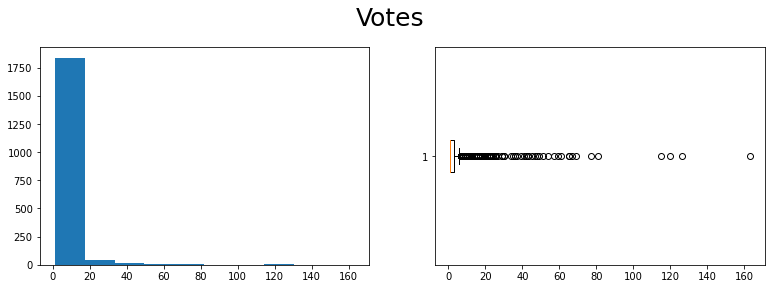

In [21]:
#Votes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))
fig.suptitle('Votes', fontsize=25, verticalalignment="center")
ax1.hist(spark_df.toPandas()["votes"])
ax2.boxplot(spark_df.toPandas()["votes"], vert = False)
plt.show()

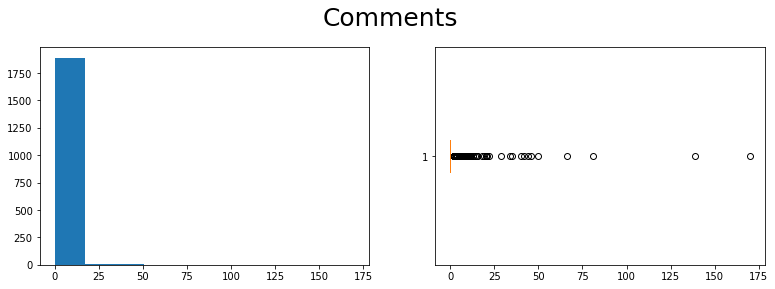

In [22]:
#Comments
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))
fig.suptitle('Comments', fontsize=25, verticalalignment="center")
ax1.hist(spark_df.toPandas()["comments"])
ax2.boxplot(spark_df.toPandas()["comments"], vert = False)
plt.show()

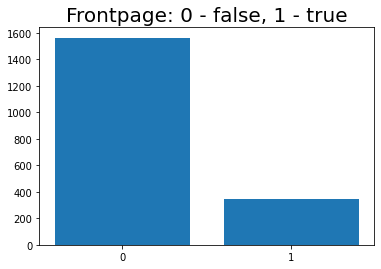

In [23]:
#Frontpage
from matplotlib.ticker import MaxNLocator
plt.bar(spark_df.toPandas()['frontpage'].unique(), spark_df.toPandas()['frontpage'].value_counts(), align = 'center')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Frontpage: 0 - false, 1 - true", fontsize=20)
plt.show()

In [24]:
#Checking for missing values
from pyspark.sql.functions import isnull, when, count, col, isnull
spark_df.select([count(when(isnull(c),c)).alias(c) for c in spark_df.columns]).show()

+---+-----+---+------+-----+----+---------+--------+------------+-----------+---------+
|aid|title|url|domain|votes|user|posted_at|comments|source_title|source_text|frontpage|
+---+-----+---+------+-----+----+---------+--------+------------+-----------+---------+
|  0|    0|  0|     0|    0|   0|        0|       0|          82|         24|        0|
+---+-----+---+------+-----+----+---------+--------+------------+-----------+---------+



In [25]:
#Checking for unique values across categorical variables
#Title
spark_df.select('title').distinct().show(5,truncate=False)
title_c=spark_df.select('title').distinct().count()
print(f"Title has {title_c} unique values.")

+------------------------------------------------------------------------+
|title                                                                   |
+------------------------------------------------------------------------+
|How to Fund FOSS, Save It from the CRA, and Improve Cybersecurity       |
|The Sass project has become unreliable, political and abusive           |
|AI Sticker Generator – open-source sticker generator for web application|
|The Metaverse Is Dead                                                   |
|Is the Gnome Foundation Going to Go Bankrupt in 1 Year?                 |
+------------------------------------------------------------------------+
only showing top 5 rows

Title has 1878 unique values.


In [26]:
#Url
spark_df.select('url').distinct().show(5,truncate=False)
url_c=spark_df.select('url').distinct().count()
print(f"Url has {url_c} unique values.")

+----------------------------------------------------------------------------------------------------------------------+
|url                                                                                                                   |
+----------------------------------------------------------------------------------------------------------------------+
|https://threlte.xyz/                                                                                                  |
|https://github.blog/2024-04-26-github-actions-arm64-and-the-future-of-automotive-software-development/                |
|https://www.pdflabs.com/tools/pdftk-the-pdf-toolkit/                                                                  |
|https://english.elpais.com/technology/2024-04-28/a-wolf-in-its-clothing-why-mark-zuckerbergs-style-choices-matter.html|
|https://www.youtube.com/watch?v=bYuz6xOAkfc                                                                           |
+-------------------------------

In [27]:
#Domain
spark_df.select('domain').distinct().show(5,truncate=False)
domain_c=spark_df.select('domain').distinct().count()
print(f"Domain has {domain_c} unique values.")

+-------------------+
|domain             |
+-------------------+
|jamesg.blog        |
|semiengineering.com|
|nytimes.com        |
|github.com/tmux    |
|builtfor.dev       |
+-------------------+
only showing top 5 rows

Domain has 1220 unique values.


In [28]:
#User
spark_df.select('user').distinct().show(5,truncate=False)
user_c=spark_df.select('user').distinct().count()
print(f"User has {user_c} unique values.")

+---------+
|user     |
+---------+
|cebert   |
|layer8   |
|tosh     |
|PaulHoule|
|networked|
+---------+
only showing top 5 rows

User has 1150 unique values.


In [29]:
#Posted-at
spark_df.select('posted_at').distinct().show(5,truncate=False)
posted_at_c=spark_df.select('posted_at').distinct().count()
print(f"Posted_at has {posted_at_c} unique values.")

+-------------------+
|posted_at          |
+-------------------+
|2024-04-29 22:45:45|
|2024-04-28 23:47:44|
|2024-04-29 22:45:11|
|2024-04-28 22:50:05|
|2024-04-30 00:44:14|
+-------------------+
only showing top 5 rows

Posted_at has 1901 unique values.


In [30]:
#Source-title
spark_df.select('source_title').distinct().show(5,truncate=False)
source_title_c=spark_df.select('source_title').distinct().count()
print(f"Source_title has {source_title_c} unique values.")

+--------------------------------------------------------------------------------------------------------------------------+
|source_title                                                                                                              |
+--------------------------------------------------------------------------------------------------------------------------+
|Rabbit R1 - We Gotta Talk...                                                                                              |
|Paper page - LEGENT: Open Platform for Embodied Agents                                                                    |
|Just a moment...                                                                                                          |
|"Growing concerns" that Ozempic will disrupt big tobacco, candy companies, and alcohol brands, according to Morgan Stanley|
|Rabbit R1: Barely Reviewable                                                                                              |


In [31]:
#Checking for unique values across numeric variables
#Votes
votes_d_list=spark_df.select('votes').distinct().sort("votes").collect()
votes_d = [int(row.votes) for row in votes_d_list]
print(votes_d)
votes_c=spark_df.select('votes').distinct().count()
print(f"Votes has {votes_c} unique values.")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 34, 35, 36, 37, 39, 41, 42, 43, 45, 47, 48, 49, 51, 54, 57, 59, 61, 65, 67, 69, 77, 81, 115, 120, 126, 163]
Votes has 55 unique values.


In [32]:
#Comments
comments_d_list=spark_df.select('comments').distinct().sort("comments").collect()
comments_d = [int(row.comments) for row in comments_d_list]
print(comments_d)
comments_c=spark_df.select('comments').distinct().count()
print(f"Comments has {comments_c} unique values.")

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 29, 34, 35, 40, 42, 44, 46, 50, 66, 81, 139, 170]
Comments has 32 unique values.


In [ ]:
#Exploring titles (extra exploration, maybe automatic classification, sentiment analysis, or something else)

In [ ]:
#Exploring domains (extra exploration, maybe automatic or manual classification, or something else)

In [ ]:
#Exploring source_text

## 2. Building the model to predict the target ("frontpage") based on the available features

Things to be taken into account:
1) Data imbalance in Y ("frontpage"): "true" values are too few, "false" values are too many.

Possible solutions: undersampling of the majority class, oversampling of the minority class, other methods...

2) According to the task, it's crucial to use Spark MLlib to train our models.

3) Some preprocessing is required before building the model.

Out of the 11 initial variables, 5 were left in the final dataset: title, domain, votes, comments and frontpage. The remaining 6 variables (aid, url, user, posted_at, source_title, source_text) were discarded for the following reasons. Aid is a unique identifier per publication. Domain and url convey the same kind of information, yet domain has a more structured form. User represents unique user names and posted_at reflects the exact time of publication, up to seconds. Title and source_title convey the same information, yet title has no None values. Source_text in some cases contains None values. 

(Feel free to change it, if needed)

In [33]:
#Selecting variables for the training dataset
spark_df = spark_df.select("title", "domain", "votes", "comments", "frontpage")

In [34]:
#Performing the train/test split
train, test = spark_df.randomSplit([0.8, 0.2], seed=0)

In [35]:
print(train.count())
print(test.count())

1522
386


In [ ]:
#Preprocessing

In [ ]:
#Building models using spark.ml (MLlib)

## 3. Using the trained model to make predictions as the stream comes in

I.e. show that we can connect to the data source, preprocess/featurize incoming messages, have our model predict the label, and show it, similar to spark_streaming_example_predicting.ipynb.

## Conclusion